<a href="https://colab.research.google.com/github/Hitesh123mori/HandlingMissingValue--Mean-Median-Imputation-MachineLearning/blob/main/Mean_Median_Imputation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv("DatasetMarks.csv")

In [ ]:
df.head()

NameError: ignored

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Name    6 non-null      object 
 1   Age     4 non-null      float64
 2   Mark1   3 non-null      float64
 3   Mark2   4 non-null      float64
 4   Mark3   3 non-null      float64
 5   Total   0 non-null      float64
dtypes: float64(5), object(1)
memory usage: 416.0+ bytes


In [ ]:
df.isnull().mean()*100

Name        0.000000
Age        33.333333
Mark1      50.000000
Mark2      33.333333
Mark3      50.000000
Total     100.000000
dtype: float64

In [ ]:
x = df.drop(columns=['Name'])
print(x)

    Age  Mark1   Mark2  Mark3  Total
0  12.0    78.0   76.0   56.0    NaN
1   NaN     NaN   67.0   76.0    NaN
2  12.0     NaN   88.0    NaN    NaN
3  13.0    87.0    NaN   87.0    NaN
4  11.0    90.0   78.0    NaN    NaN
5   NaN     NaN    NaN    NaN    NaN


In [ ]:
y = df['Name']
print(y)

0    A
1    B
2    C
3    D
4    E
5    F
Name: Name, dtype: object


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

x_train.shape,x_test.shape

((4, 5), (2, 5))

In [ ]:
x_train

,Age,Mark1,Mark2,Mark3,Total
4,11.0,90.0,78.0,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN
2,12.0,NaN,88.0,NaN,NaN
3,13.0,87.0,NaN,87.0,NaN


In [ ]:
x_test

,Age,Mark1,Mark2,Mark3,Total
1,NaN,NaN,67.0,76.0,NaN
0,12.0,78.0,76.0,56.0,NaN


In [ ]:
x_train.isnull().mean()*100

Age        25.0
Mark1      50.0
Mark2      50.0
Mark3      75.0
Total     100.0
dtype: float64

In [ ]:
mean_age = x_train['Age'].mean()
median_age = x_train['Age'].median()

mean_mark1 = x_train['Mark1 '].mean()
median_mark1 = x_train['Mark1 '].median()

mean_mark2 = x_train['Mark2'].mean()
median_mark2  = x_train['Mark2'].median()

mean_mark3 = x_train['Mark3'].mean()
median_mark3 = x_train['Mark3'].median()




In [ ]:
x_train['Age_Mean'] = x_train['Age'].fillna(mean_age)
x_train['Age_Median'] = x_train['Age'].fillna(median_age)

x_train['Mark1_Mean'] = x_train['Mark1 '].fillna(mean_mark1)
x_train['Mark1_Median'] = x_train['Mark1 '].fillna(median_mark1)

x_train['Mark2_Mean'] = x_train['Mark2'].fillna(mean_mark2)
x_train['Mark2_Median'] = x_train['Mark2'].fillna(median_mark2)

x_train['Mark3_Mean'] = x_train['Mark3'].fillna(mean_mark3)
x_train['Mark3_Median'] = x_train['Mark3'].fillna(median_mark3)

In [ ]:
x_train.sample(3)

,Age,Mark1,Mark2,Mark3,Total,Age_Mean,Age_Median,Mark1_Mean,Mark1_Median,Mark2_Mean,Mark2_Median,Mark3_Mean,Mark3_Median
5,NaN,NaN,NaN,NaN,NaN,12.0,12.0,88.5,88.5,83.0,83.0,87.0,87.0
2,12.0,NaN,88.0,NaN,NaN,12.0,12.0,88.5,88.5,88.0,88.0,87.0,87.0
3,13.0,87.0,NaN,87.0,NaN,13.0,13.0,87.0,87.0,83.0,83.0,87.0,87.0


In [ ]:
print(f"Age Variance : {x_train['Age'].var()}")

print(f"Age after mean imputation : {x_train['Age'].var()}")

print(f"Age after median_imputation : {x_train['Age'].var()}")


Age Variance : 1.0
Age after mean imputation : 1.0
Age after median_imputation : 1.0


In [ ]:
print(f"Mark1 Variance : {x_train['Mark1 '].var()}")

print(f"Mark1 Variance after mean imputation : {x_train['Mark1 '].var()}")

print(f"Mark1 Variance  median_imputation : {x_train['Mark1 '].var()}")


Mark1 Variance : 4.5
Mark1 Variance after mean imputation : 4.5
Mark1 Variance  median_imputation : 4.5


In [ ]:
print(f"Mark2 Variance : {x_train['Mark2'].var()}")

print(f"Mark2 Variance after mean imputation : {x_train['Mark2'].var()}")

print(f"Mark2 Variance after median_imputation : {x_train['Mark2'].var()}")


Mark2 Variance : 50.0
Mark2 Variance after mean imputation : 50.0
Mark2 Variance after median_imputation : 50.0


In [ ]:
print(f"Mark3 Variance : {x_train['Mark3'].var()}")

print(f"Mark3  Variance after mean imputation : {x_train['Mark3'].var()}")

print(f"Mark3 Variance after median_imputation : {x_train['Mark3'].var()}")


Mark3 Variance : nan
Mark3  Variance after mean imputation : nan
Mark3 Variance after median_imputation : nan


In [ ]:
x_train.isnull()

,Age,Mark1,Mark2,Mark3,Total,Age_Mean,Age_Median,Mark1_Mean,Mark1_Median,Mark2_Mean,Mark2_Median,Mark3_Mean,Mark3_Median
4,False,False,False,True,True,False,False,False,False,False,False,False,False
5,True,True,True,True,True,False,False,False,False,False,False,False,False
2,False,True,False,True,True,False,False,False,False,False,False,False,False
3,False,False,True,False,True,False,False,False,False,False,False,False,False


In [ ]:
x_train.isnull().mean()*100

Age              25.0
Mark1            50.0
Mark2            50.0
Mark3            75.0
Total           100.0
Age_Mean          0.0
Age_Median        0.0
Mark1_Mean        0.0
Mark1_Median      0.0
Mark2_Mean        0.0
Mark2_Median      0.0
Mark3_Mean        0.0
Mark3_Median      0.0
dtype: float64

<Axes: ylabel='Density'>

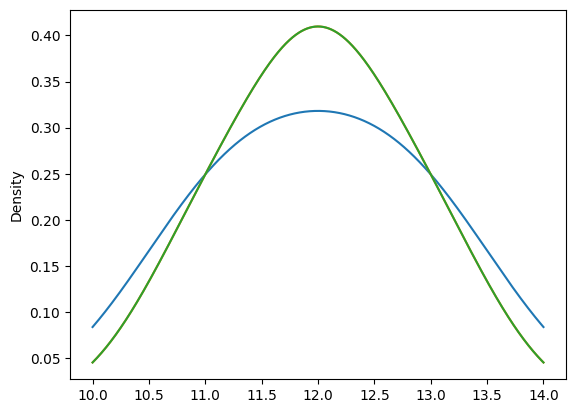

In [ ]:
fig  = plt.figure()
ax  = fig.add_subplot()

x_train['Age'].plot(ax=ax,kind = 'kde')
x_train['Age_Mean'].plot(ax=ax,kind ='kde')
x_train['Age_Median'].plot(ax=ax,kind = 'kde')

<Axes: ylabel='Density'>

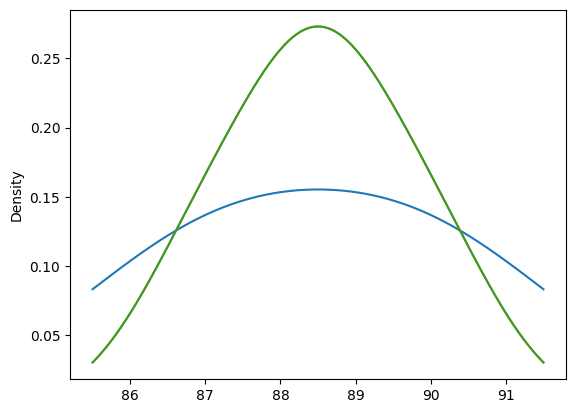

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

x_train['Mark1 '].plot(kind = 'kde',ax=ax)
x_train['Mark1_Mean'].plot(kind='kde',ax=ax)
x_train['Mark1_Median'].plot(kind='kde',ax=ax)

<Axes: ylabel='Density'>

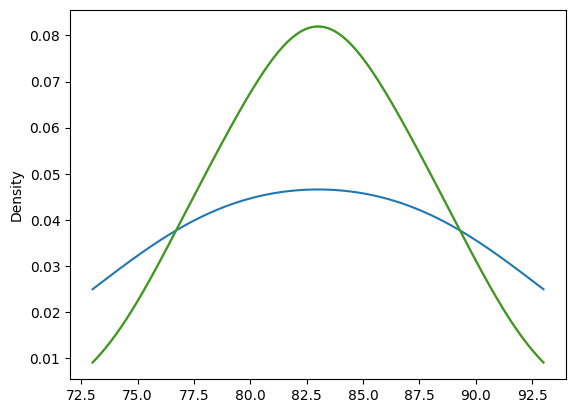

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

x_train['Mark2'].plot(kind = 'kde',ax=ax)
x_train['Mark2_Mean'].plot(kind='kde',ax=ax)
x_train['Mark2_Median'].plot(kind='kde',ax=ax)

ValueError: ignored

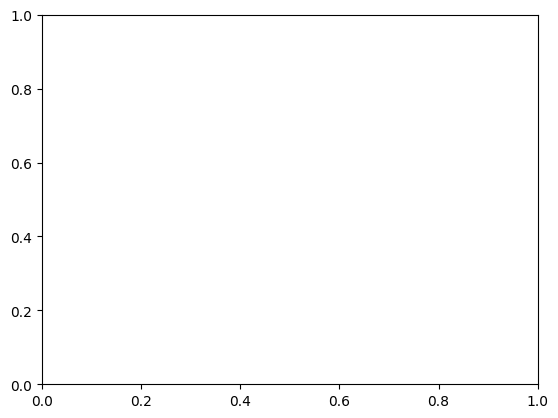

In [71]:
fig = plt.figure()
ax = fig.add_subplot()

x_train['Mark3'].plot(kind = 'kde',ax=ax)
x_train['Mark3_Mean'].plot(kind='kde',ax=ax)
x_train['Mark3_Median'].plot(kind='kde',ax=ax)

In [ ]:
x_train.cov()

,Age,Mark1,Mark2,Mark3,Total,Age_Mean,Age_Median,Mark1_Mean,Mark1_Median,Mark2_Mean,Mark2_Median,Mark3_Mean,Mark3_Median
Age,2.0,-3.00,NaN,NaN,NaN,2.000000,2.000000,-3.00,-3.00,-5.500000,-5.500000,5.500000,5.500000
Mark1,-3.0,4.50,NaN,NaN,NaN,-3.000000,-3.000000,4.50,4.50,8.250000,8.250000,-8.250000,-8.250000
Mark2,NaN,NaN,60.50,NaN,NaN,-5.500000,-5.500000,8.25,8.25,60.500000,60.500000,30.250000,30.250000
Mark3,NaN,NaN,NaN,60.50,NaN,5.500000,5.500000,-8.25,-8.25,30.250000,30.250000,60.500000,60.500000
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_Mean,2.0,-3.00,-5.50,5.50,NaN,0.666667,0.666667,-1.00,-1.00,-1.833333,-1.833333,1.833333,1.833333
Age_Median,2.0,-3.00,-5.50,5.50,NaN,0.666667,0.666667,-1.00,-1.00,-1.833333,-1.833333,1.833333,1.833333
Mark1_Mean,-3.0,4.50,8.25,-8.25,NaN,-1.000000,-1.000000,1.50,1.50,2.750000,2.750000,-2.750000,-2.750000
Mark1_Median,-3.0,4.50,8.25,-8.25,NaN,-1.000000,-1.000000,1.50,1.50,2.750000,2.750000,-2.750000,-2.750000
Mark2_Mean,-5.5,8.25,60.50,30.25,NaN,-1.833333,-1.833333,2.75,2.75,20.166667,20.166667,10.083333,10.083333


In [ ]:
x_train.corr()

,Age,Mark1,Mark2,Mark3,Total,Age_Mean,Age_Median,Mark1_Mean,Mark1_Median,Mark2_Mean,Mark2_Median,Mark3_Mean,Mark3_Median
Age,1.0,-1.0,1.0,NaN,NaN,1.0,1.0,-1.0,-1.0,0.5,0.5,NaN,NaN
Mark1,-1.0,1.0,NaN,NaN,NaN,-1.0,-1.0,1.0,1.0,-1.0,-1.0,NaN,NaN
Mark2,1.0,NaN,1.0,NaN,NaN,1.0,1.0,-1.0,-1.0,1.0,1.0,NaN,NaN
Mark3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age_Mean,1.0,-1.0,1.0,NaN,NaN,1.0,1.0,-1.0,-1.0,0.5,0.5,NaN,NaN
Age_Median,1.0,-1.0,1.0,NaN,NaN,1.0,1.0,-1.0,-1.0,0.5,0.5,NaN,NaN
Mark1_Mean,-1.0,1.0,-1.0,NaN,NaN,-1.0,-1.0,1.0,1.0,-0.5,-0.5,NaN,NaN
Mark1_Median,-1.0,1.0,-1.0,NaN,NaN,-1.0,-1.0,1.0,1.0,-0.5,-0.5,NaN,NaN
Mark2_Mean,0.5,-1.0,1.0,NaN,NaN,0.5,0.5,-0.5,-0.5,1.0,1.0,NaN,NaN


<Axes: >

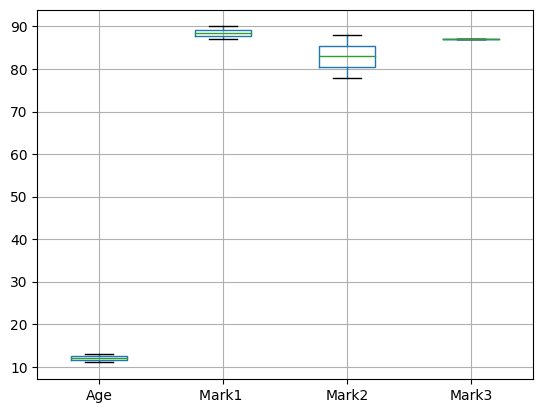

In [ ]:
x_train[['Age','Mark1 ','Mark2','Mark3']].boxplot()

<Axes: >

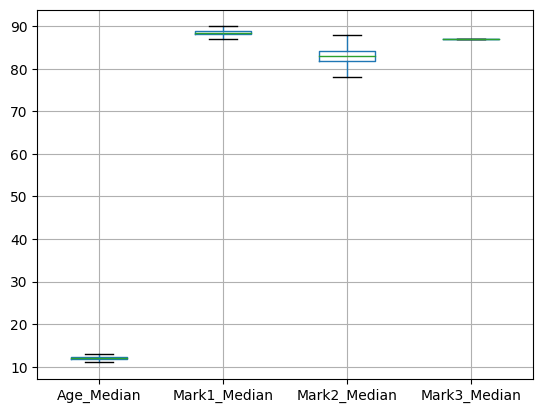

In [ ]:
x_train[['Age_Median','Mark1_Median','Mark2_Median','Mark3_Median']].boxplot()

<Axes: >

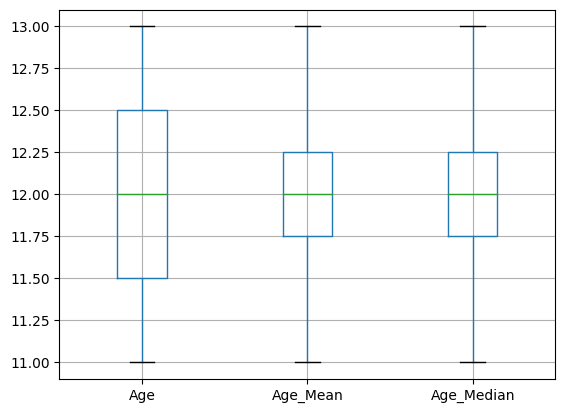

In [ ]:
x_train[['Age','Age_Mean','Age_Median']].boxplot()

<Axes: >

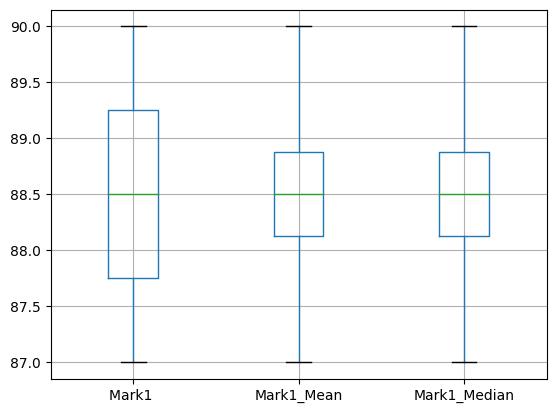

In [ ]:
x_train[['Mark1 ','Mark1_Mean','Mark1_Median']].boxplot()

<Axes: >

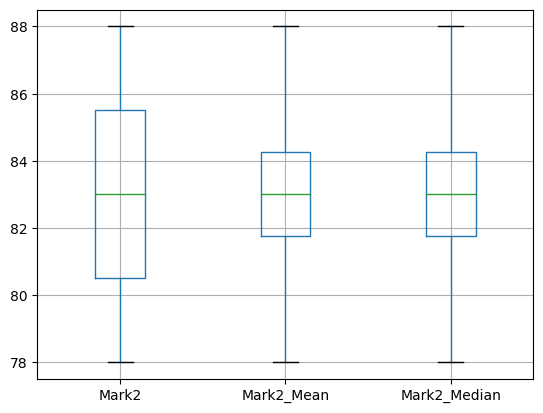

In [ ]:
x_train[['Mark2','Mark2_Mean','Mark2_Median']].boxplot()

<Axes: >

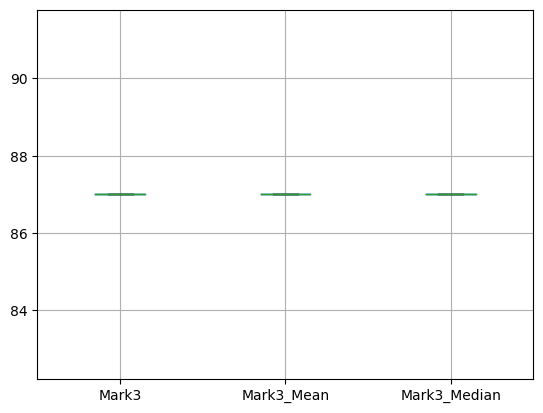

In [ ]:
x_train[['Mark3','Mark3_Mean','Mark3_Median']].boxplot()

In [68]:
x_trainfinal = x_train.drop(columns=['Age','Mark1 ','Mark2','Mark3','Age_Median','Mark1_Median','Mark2_Median','Mark3_Median'])

In [69]:
x_trainfinal

,Total,Age_Mean,Mark1_Mean,Mark2_Mean,Mark3_Mean
4,NaN,11.0,90.0,78.0,87.0
5,NaN,12.0,88.5,83.0,87.0
2,NaN,12.0,88.5,88.0,87.0
3,NaN,13.0,87.0,83.0,87.0


In [70]:
mean_age = x_test['Age'].mean()
median_age = x_test['Age'].median()

mean_mark1 = x_test['Mark1 '].mean()
median_mark1 = x_test['Mark1 '].median()

mean_mark2 = x_test['Mark2'].mean()
median_mark2  = x_test['Mark2'].median()

mean_mark3 = x_test['Mark3'].mean()
median_mark3 = x_test['Mark3'].median()




In [74]:
x_test['Age_Mean'] = x_test['Age'].fillna(mean_age)
x_test['Age_Median'] = x_test['Age'].fillna(median_age)

x_test['Mark1_Mean'] = x_test['Mark1 '].fillna(mean_mark1)
x_test['Mark1_Median'] = x_test['Mark1 '].fillna(median_mark1)

x_test['Mark2_Mean'] = x_test['Mark2'].fillna(mean_mark2)
x_test['Mark2_Median'] = x_test['Mark2'].fillna(median_mark2)

x_test['Mark3_Mean'] = x_test['Mark3'].fillna(mean_mark3)
x_test['Mark3_Median'] = x_test['Mark3'].fillna(median_mark3)

In [75]:
x_testfinal = x_test.drop(columns=['Age','Mark1 ','Mark2','Mark3','Age_Median','Mark1_Median','Mark2_Median','Mark3_Median'])

In [76]:
x_testfinal

,Total,Age_Mean,Mark1_Mean,Mark2_Mean,Mark3_Mean
1,NaN,12.0,78.0,67.0,76.0
0,NaN,12.0,78.0,76.0,56.0


In [79]:
xdatasetfinal = np.row_stack((x_testfinal,x_trainfinal))
print(xdatasetfinal)

[[ nan 12.  78.  67.  76. ]
 [ nan 12.  78.  76.  56. ]
 [ nan 11.  90.  78.  87. ]
 [ nan 12.  88.5 83.  87. ]
 [ nan 12.  88.5 88.  87. ]
 [ nan 13.  87.  83.  87. ]]


Other Method

In [85]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

In [86]:
imputer1 = SimpleImputer(strategy='median')
imputer2 =SimpleImputer(strategy = 'mean')

In [88]:
trf = ColumnTransformer(
    [
        ('imputer1',imputer1,['Age']),
        ('imputer2',imputer2,['Mark1 '])
    ]
)

In [89]:
trf.fit(x_train)

ColumnTransformer(transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Mark1 '])])

In [90]:
trf.named_transformers_['imputer1'].statistics_

array([12.])

In [91]:
trf.named_transformers_['imputer2'].statistics_

array([88.5])